In [5]:
from skimage import data
from importlib import reload
import im_processing as imp
import matplotlib.pyplot as plt 
reload(imp)


<module 'im_processing' from '/Users/eddymina/Code/Python/projects/image_processing/im_processing.py'>

In [6]:
import sys
sys.version


'3.6.8 |Anaconda custom (64-bit)| (default, Dec 29 2018, 19:04:46) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [7]:
#Get some images 
coffee = data.coffee()
print(data.coffee().shape )
checker= data.checkerboard()
print(data.checkerboard().shape )
camera = data.camera()
print(data.camera().shape )
imm = data.immunohistochemistry()
print(data.immunohistochemistry().shape )

(400, 600, 3)
(200, 200)
(512, 512)
(512, 512, 3)


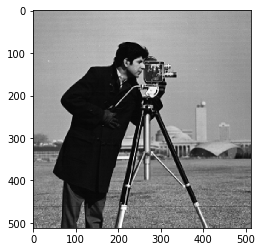

In [8]:
imp.plot_grey(camera)

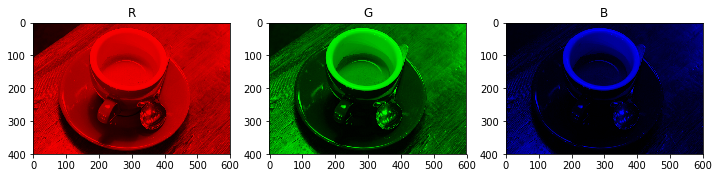

In [9]:
imp.image(coffee).color_isolation(plot=True)

/Users/eddymina/anaconda3/envs/stable/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


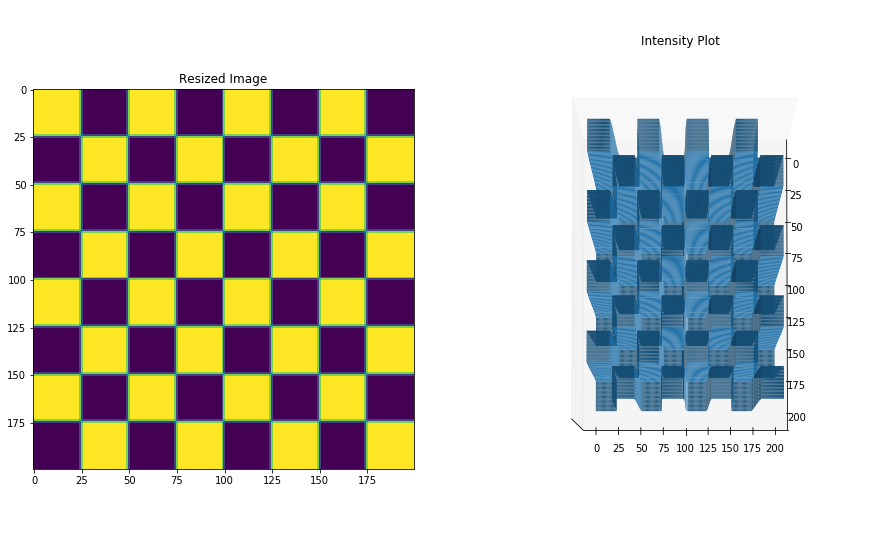

In [10]:
imp.image(checker).intensity_plot()

In [13]:
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='eddiem623', api_key='IMU4ZpT0Mh815BKMs0hj')


def intensity_plot(img):
    data = [go.Surface(z= img)]
    layout = go.Layout(title='Intensity_Plot',autosize=False,
        width=500,height=500,
        margin=dict(l=65,r=50,b=65,t=90))
    return go.Figure(data=data, layout=layout)
    

    
py.iplot(intensity_plot(camera))


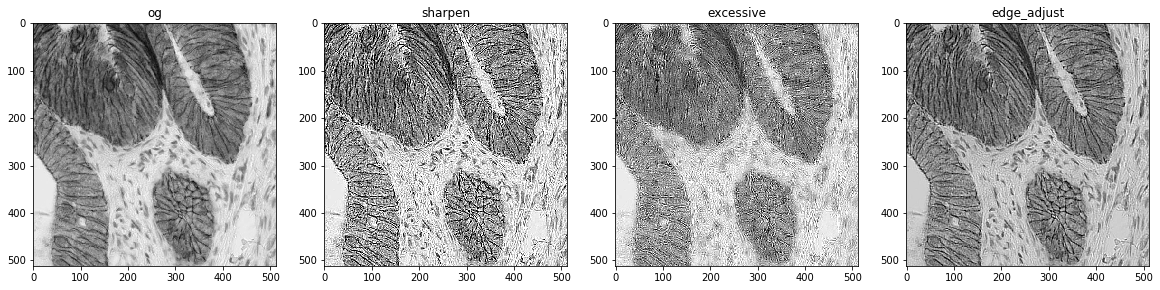

In [214]:
sharp = imp.sharpen(imm)
plt.figure(figsize=(20,20))
titles= ['og','sharpen','excessive','edge_adjust']
ims= [imm,sharp.sharpen(),sharp.excessive(),sharp.edge_enhance()]
imp.im_subplot(ims,[1,4],titles=titles,cmap='gray')

(1412, 900)

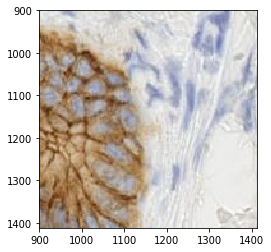

In [197]:
zoomed= imp.image(imm).zoom_dup(3)
imp.plot_grey(zoomed)
n=900
plt.xlim(n,camera.shape[0]+n)
plt.ylim(camera.shape[1]+n,n)

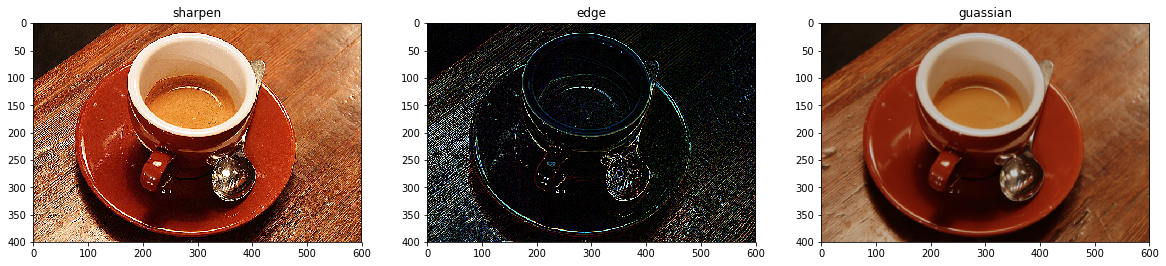

In [213]:
k=imp.simple_kernel(coffee)
plt.figure(figsize=(20,20))
ims = [k.sharpen_filter(),k.edge_filter(),k.gaussian_filter()]
titles= ['sharpen','edge','guassian']
imp.im_subplot(ims,[1,3],titles=titles,cmap='gray')

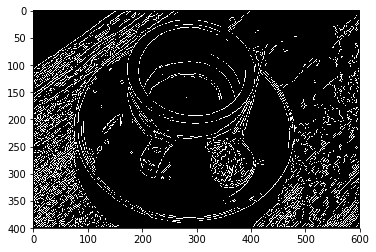

In [216]:
#using canny 
imm= imp.image(coffee).rgb2gray()
imp.plot_grey(imp.edge_finder(imm).isolate())